# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

# *1. Dataset Preparation*

In [ ]:
data = pd.read_csv('most-polluted-countries.csv')

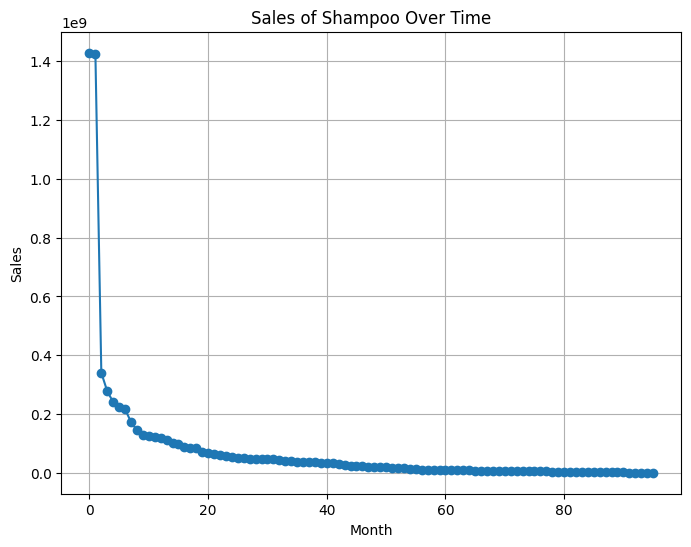

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(data.index, data['pollution_2023'], marker = 'o', linestyle = '-')
plt.title('Sales of Shampoo Over Time')

plt.xlabel('Month')
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# *2. Stationarity Testing*

In [ ]:
pollution_levels = data['pollution_2023']

result = adfuller(pollution_levels)
p_value = result[1]

if p_value < 0.05:
    print(f"P-value: {p_value:.4f} (Reject null hypothesis)")
    print("The time series is likely stationary.")
else:
    print(f"P-value: {p_value:.4f} (Fail to reject null hypothesis)")
    print("The time series is likely non-stationary.")

print("\nImplications:")
print("1. Stationary time series are easier to model and analyze.")
print("2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.")
print("3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.")


P-value: 0.0148 (Reject null hypothesis)
The time series is likely stationary.

Implications:
1. Stationary time series are easier to model and analyze.
2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.
3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.


# *3. ARIMA Model Identification*

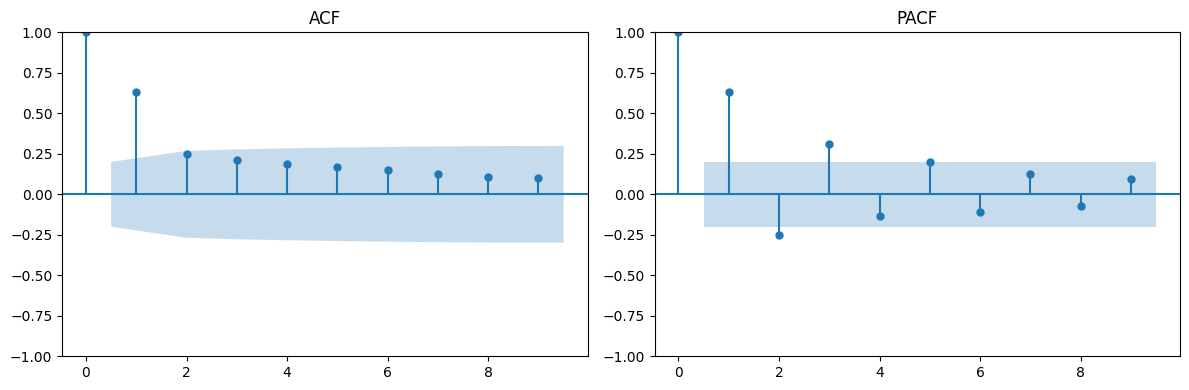

In [ ]:
pollution_levels = data['pollution_2023']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(pollution_levels, lags=9, ax=axes[0], title="ACF")
plot_pacf(pollution_levels, lags=9, ax=axes[1], title="PACF")

plt.tight_layout()
plt.show()


In [ ]:
adf_test = adfuller(data['pollution_2023'])
print('ADF Statistics: ', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistics:  -3.300734202893016
p-value: 0.01484568748394119


# *4. ARIMA Model Fitting*

In [ ]:
model = ARIMA(data['pollution_2023'], order = (1, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Tue, 26 Mar 2024   AIC                          43292.288
Time:                        20:56:42   BIC                          43299.949
Sample:                             0   HQIC                         43295.384
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

# *5. Forecasting*

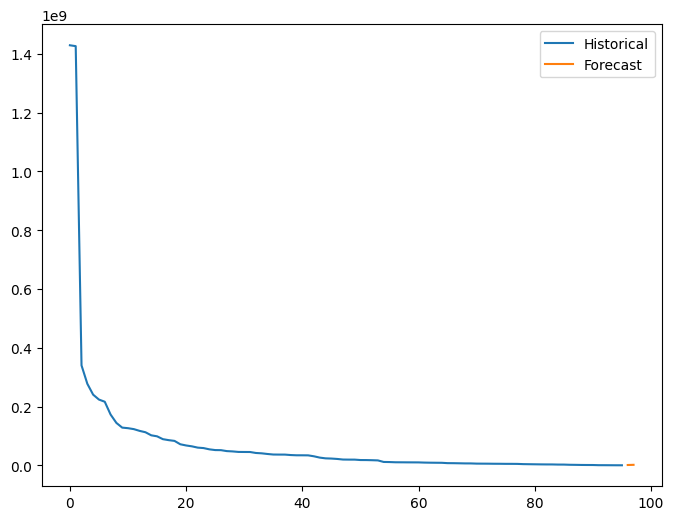

In [ ]:
forecast = results.forecast(steps = 2)

plt.figure(figsize = (8, 6))
plt.plot(data.index, data['pollution_2023'], label = 'Historical')
plt.plot(forecast.index, forecast, label = 'Forecast')
plt.legend()
plt.show()

# *6. Report and Insights*

In [20]:
report = f"""
REPORT

1. Stationarity Testing
The stationarity of the time series data is tested using the Augmented Dickey-Fuller (ADF) test:

P-value: {p_value} (Reject null hypothesis)
ADF Statistics: { adf_test[0]}

2. ARIMA Model Fitting
An ARIMA(1,1,1) model is fitted to the data:

{results.summary()}

3. Forecasting

The ARIMA model is used to forecast future pollution levels.
A forecast for two steps ahead represents a forecast for two years:
"""

print(report)

print('\n' + '-' * 120)

insights = """
INSIGHTS

Forecasted Pollution Levels:
According to the ARIMA model, pollution levels are anticipated to rise steadily over the next two years.
These forecasts come with a margin of uncertainty, represented by confidence intervals.

Real-World Implications:
Accurate pollution forecasts aid in environmental policy formulation, resource allocation, health impact assessment, and economic planning.
They inform policymakers about the effectiveness of existing policies, optimize resource allocation for pollution control measures,
aid healthcare authorities in preparing for health crises, and help businesses and governments mitigate potential economic losses.
"""

print(insights)


REPORT

1. Stationarity Testing
The stationarity of the time series data is tested using the Augmented Dickey-Fuller (ADF) test:

P-value: 0.01484568748394119 (Reject null hypothesis)
ADF Statistics: -3.300734202893016

2. ARIMA Model Fitting
An ARIMA(1,1,1) model is fitted to the data: 

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Tue, 26 Mar 2024   AIC                          43292.288
Time:                        21:57:54   BIC                          43299.949
Sample:                             0   HQIC                         43295.384
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975